# Hypothesis Test, Test statistic and P-Value

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from loess.loess_1d import loess_1d

## Hypothesis Test

$$
\begin{align}
H_0 &: \beta_1 = 0 \\
H_A &: \beta_1 \neq 0
\end{align}
$$

## Test statistic

$$
\begin{align}
T=\frac{\hat{\beta}_1 - 0}{se(\hat{\beta}_1)}
\end{align}
$$

- Test statistic $T$ measures the number of standard deviations that $\hat{\beta}_1$ is away from 0
- If there is really no relationship between X and Y, that is $H_0$ is true, then we expect that $T$ follows a t-distribution with $n-2$ degrees of freedom.
- p-value: Probability of observing any value of $T$ larger than $|t|$
    - If $p < \alpha$: then we reject $H_0$ and conclude that there is no relationship between $X$ and $Y$
    - If $p > \alpha$: then we failed to reject $H_0$

## t-Test in Linear Regression

- Model $$Y = \beta_0 + \beta_1 X + \epsilon_i, \quad \epsilon \sim N(0, \sigma^2)$$
- Hypothesis: $$\begin{align} H_0 &: \beta_1 = 0 \\ H_A &: \beta_1 \neq 0 \text{ (two-sided test)} \end{align}$$
- Test statistic: $$T = \frac{\hat{\beta}_1 - 0}{se(\hat{\beta}_1)}$$ Null Distribution assuming $H_0$ is true: $T\sim t_{n - 2}$
- Significance level: $\alpha$
- Rejection Region for Test statistic: $$C = \Bigl( - \inf; t_{n - 2; \frac{\alpha}{2}} \Bigr] \cup \Bigl[t_{n - 2; 1 - \frac{\alpha}{2}}; \inf \Bigr) $$
- Test decision: Verify whether observed $t$ falls into rejection area

In [108]:
model = stats.norm(0, 3)
func = lambda x: 2.74 + 1.42 * x

x = np.linspace(0, 10, 100)
y = func(x) + model.rvs(x.shape[0])

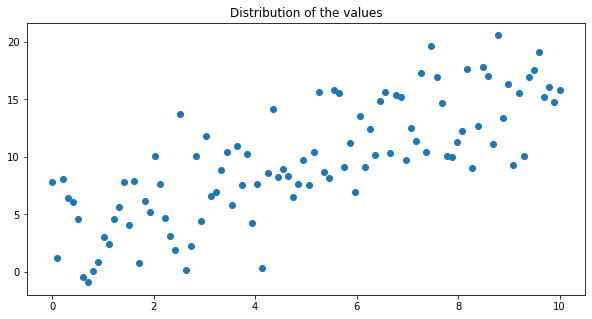

In [109]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.title("Distribution of the values")
plt.show()

In [110]:
x_mean = np.mean(x)
y_mean = np.mean(y)

b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
b0 = y_mean - b1 * x_mean
b1, b0

(1.3572877612681389, 2.9294112666918686)

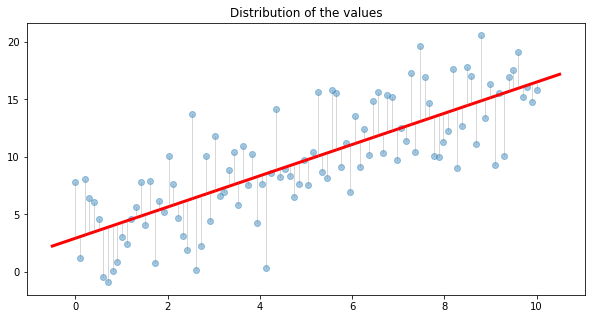

In [111]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.4)
plt.plot(np.array(plt.xlim()), np.array(plt.xlim()) * b1 + b0, c='r', lw=3)

for _x, _y in zip(x, y):
    y_hat = _x * b1 + b0
    plt.plot([_x, _x], [_y, y_hat], alpha=.3, c='grey', lw=1)

plt.title("Distribution of the values")
plt.show()

In [112]:
rss = np.sum((y - (x * b1 + b0)) ** 2)
rss

1034.4160446891703

In [113]:
rse = np.sqrt(rss / (x.shape[0] - 2))
rse

3.2488868496970453

In [114]:
se_0 = rse ** 2 * ((1 / x.shape[0]) + (x_mean ** 2) / np.sum((x - x_mean) ** 2))
se_1 = (rse ** 2) / np.sum((x - x_mean) ** 2)

se_0, se_1

(0.415940175577177, 0.012415500718233325)

In [115]:
t = b1 / np.sqrt(se_1)
t

12.181192694650209

> $\hat{\beta}_1$ is approximately 12 standard errors $se(\hat{\beta}_1)$ away from 0

In [118]:
alpha = 0.05
c_left = stats.t(x.shape[0] - 2).ppf(alpha / 2)
c_right = stats.t(x.shape[0] - 2).ppf(1 - alpha / 2)

print(f"Rejection area: (inf; {c_left}] u [{c_right};inf)")

Rejection area: (inf; -1.9844674544266925] u [1.984467454426692;inf)


In [119]:
p_value = 2 * (1 - stats.t(x.shape[0] - 2).cdf(t))
print(f"P-Value:            {p_value}")
print(f"Significant result: {p_value < alpha}")

P-Value:            0.0
Significant result: True


## Confidence interval for coefficients

$$
\Bigl[ \hat{\beta}_1 - t_{n - 2; 1 - \frac{\alpha}{2}} * se(\hat{\beta}_1); \hat{\beta}_1 + t_{n - 2; 1 - \frac{\alpha}{2}} * se(\hat{\beta}_1) \Bigr]
$$

In [120]:
t = stats.t(x.shape[0] - 2).ppf(1 - alpha / 2)
lo = b1 - t * np.sqrt(se_1)
up = b1 + t * np.sqrt(se_1)

print(f"Confidence Interval for coefficient 1: [{lo}; {up}]")

Confidence Interval for coefficient 1: [1.1361687414769794; 1.5784067810592983]


## Model Assumptions fro the Error Terms

The error terms $\epsilon_i$ are independent and normally distributed random variables with a constant variance
$$
\epsilon_i \sim N(0, \sigma^2)
$$

1. For the expected value of all $\epsilon_i$ we have $$E(\epsilon_i) = 0$$
2. The error terms $\epsilon_i$ all have the same constant variance $$Var(\epsilon_i) = \sigma^2$$
3. The error terms $\epsilon_i$ are normally distributed
4. The error terms $\epsilon_i$ are independent

## R-squared Statistic

The $R^2$ statistic provides an alternative measure of fit
$$
R^2 = 1 - \frac{\sum_{i = 1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2} = 1 - \frac{\text{variance left after regression fit}}{\text{total variance}}
$$

- $R^2$ takes the form of a proportion - the proportion of variance explained: $R^2$ always takes on a value between 0 and 1, and is independent of the scale of Y
- If model fits perfectly the data, then $\hat{y}_i = y_i$ for all $i$ $\Rightarrow R^2 = 1$ 

In [121]:
y_hat = func(x)
r_squared = 1 - np.sum((y - y_hat) ** 2) / np.sum((y - y_mean) ** 2)
print(f"R-Squared: {r_squared}")

R-Squared: 0.6003644390601466


## Diagnostics Tools

### Testing Model Assumtion expected value of error terms

We want to identify non-linearity of the regression function $f$, that is, we want to verify model assumption $E(\epsilon) = 0$. The relevant residual plot is called **Turkey-Anscombe-Plot**

- We plot on the vertical axis the residuals $r_i = y_i - \hat{y}_i$
- We plot on the horizontal axis the fitted or predicted values $\hat{y}_i$
- We thus plot the points $(\hat{y}_i, r_i)$ for $i = 1, \dots, n$


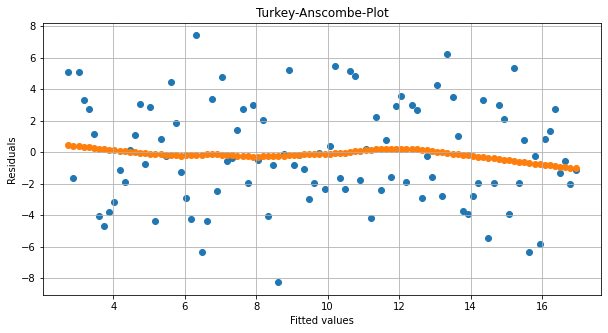

In [122]:
n = x.shape[0]
r = y - y_hat
rse = np.sqrt(1 / (n - 2) * np.sum(r ** 2))

# Turkey-Anscombe plot
plt.figure(figsize=(10, 5))
plt.scatter(y_hat, r)

res = loess_1d(y_hat, r)  # smoothing approach
plt.scatter(res[0], res[1])

plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Turkey-Anscombe-Plot")
plt.grid()
plt.show()

Non-constant variances in the errors $\epsilon_i$: **heteroscedasticity**

## Scale Location Plot
- Measure of scattering amplitude of errors: square root of the absolute value of the standardized residuals, that is $$\sqrt{|\tilde{r}_i|}$$
- Standardized residuals $\tilde{r}_i$ are defined as follows $$\tilde{r}_i = \frac{r_i}{\hat{\sigma}\sqrt{1 - \Bigl(\frac{1}{n} + \frac{(x_i - \bar{x}^2)}{\sum_{i=1}^n(x_i - \bar{x})^2}\Bigr)}}$$
- $\hat{\sigma}$: Estimate of standard deviation of error terms (estimated by RSE)
- If error terms $\epsilon_i$ are normally distributed, then $$\tilde{r}_i \sim N(0, 1)$$

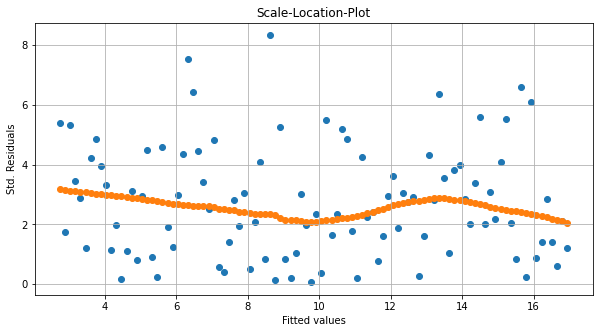

In [127]:
factor = np.sqrt(1 - (1 / x.shape[0] + (x - x_mean) ** 2 / (np.sum((x - x_mean) ** 2)) * rse))
std_r = r / factor
res = loess_1d(y_hat, np.sqrt(std_r ** 2))

plt.figure(figsize=(10, 5))
plt.scatter(y_hat, np.sqrt(std_r ** 2))
plt.scatter(res[0], res[1])
plt.xlabel("Fitted values")
plt.ylabel("Std. Residuals")
plt.title("Scale-Location-Plot")
plt.grid()
plt.show()

### Normal Distribution Assumption of the Errors

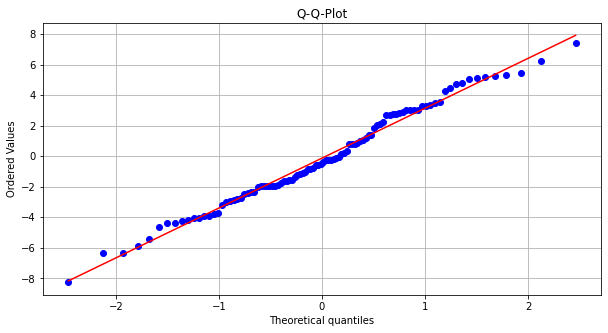

In [128]:
plt.figure(figsize=(10, 5))
stats.probplot(r, plot=plt.gca())

plt.title("Q-Q-Plot")
plt.grid()
plt.show()